# Import libraries

In [92]:
import tensorflow as tf
#from tensorflow.keras import layers
import tfimm
#import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Path generation

In [93]:
import pathlib
data_dir_train = pathlib.Path(r"C:\Users\lulu5\Documents\train")
data_dir_test = pathlib.Path(r"C:\Users\lulu5\Documents\test")
#Nombre images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_train, image_count_test)

2072 245


In [94]:
batch_size = 32
img_height = 180
img_width = 180

## Data augmentation

In [95]:
TFs = {#'height_shift_range':  .5,
       "horizontal_flip": True,
       "vertical_flip": True,
       "rotation_range": 30,
       "featurewise_std_normalization": True,
       "brightness_range": (1, 2)
       # other transformation your want
       # ...
       }
datagen = ImageDataGenerator(**TFs)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [108]:
train_generator = datagen.flow_from_directory(
    data_dir_train,
    color_mode="rgb",
    batch_size=batch_size,
    target_size=(img_height, img_width),
    shuffle=True,
    class_mode='categorical')

test_flow = datagen.flow_from_directory(
    data_dir_test,
    color_mode="rgb",
    batch_size=batch_size,
    target_size=(img_height, img_width),
    shuffle=True,
    class_mode='categorical')

Found 2072 images belonging to 10 classes.
Found 245 images belonging to 1 classes.


In [109]:
batch_x, batch_y = next(test_flow)
batch_x.shape, batch_y

((32, 180, 180, 3),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32))

In [105]:
next(test_flow)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(array([[[[255., 202.,  68.],
          [255., 204.,  68.],
          [255., 204.,  66.],
          ...,
          [255., 245., 253.],
          [253., 247., 255.],
          [255., 248., 255.]],
 
         [[255., 200.,  70.],
          [255., 200.,  70.],
          [255., 202.,  70.],
          ...,
          [255., 245., 255.],
          [253., 247., 255.],
          [255., 250., 255.]],
 
         [[255., 200.,  70.],
          [255., 200.,  70.],
          [255., 200.,  70.],
          ...,
          [253., 245., 255.],
          [253., 248., 255.],
          [255., 250., 255.]],
 
         ...,
 
         [[255., 159.,  56.],
          [255., 166.,  63.],
          [255., 169.,  75.],
          ...,
          [255., 253., 216.],
          [255., 253., 216.],
          [255., 253., 217.]],
 
         [[255., 159.,  58.],
          [255., 169.,  66.],
          [255., 171.,  78.],
          ...,
          [255., 245., 205.],
          [255., 248., 209.],
          [255., 250., 212.

ValueError: num must be 1 <= num <= 4, not 5

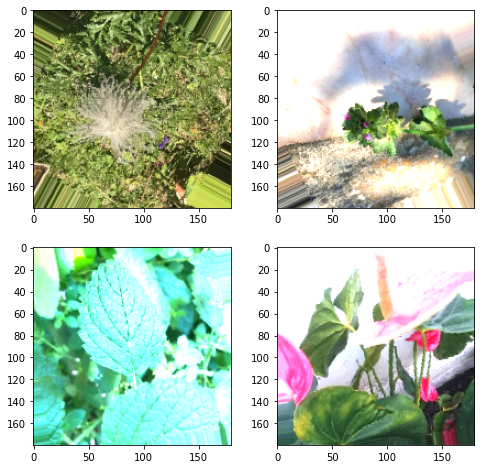

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i in range(batch_x.shape[0]):
    plt.subplot(2, 2, i+1)
    result = batch_x[i].astype('uint8')
    plt.imshow(result)

# Modèle

In [99]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000)

In [78]:
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc')
model.compile(optimizer="Adam", 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy', 'sparse_top_k_categorical_accuracy'])

In [89]:
history = model.fit(train_generator, epochs=2, validation_data=test_flow, batch_size=batch_size, verbose=1)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/2
65/65 [==============================] - ETA: 0s - loss: 0.3156 - accuracy: 0.9165 - sparse_top_k_categorical_accuracy: 0.9918

C:\Users\lulu5\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


65/65 [==============================] - 440s 7s/step - loss: 0.3156 - accuracy: 0.9165 - sparse_top_k_categorical_accuracy: 0.9918 - val_loss: 35562.9453 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 1.0000
Epoch 2/2
65/65 [==============================] - 420s 6s/step - loss: 0.2936 - accuracy: 0.9228 - sparse_top_k_categorical_accuracy: 0.9928 - val_loss: 2972.9783 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.8980


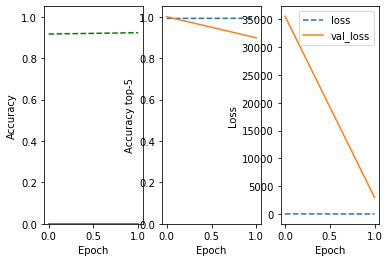

In [90]:
plt.subplot(131)
plt.plot(history.history['accuracy']    ,'--',     label='accuracy', c='g')
plt.plot(history.history['val_accuracy'],     label = 'val_accuracy', c='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.05])
plt.subplot(132)
plt.plot(history.history['sparse_top_k_categorical_accuracy']  ,'--'  ,      label='accuracy')
plt.plot(history.history['val_sparse_top_k_categorical_accuracy'],      label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy top-5')
plt.ylim([0.0, 1.05])
plt.subplot(133)
plt.plot(history.history['loss']    ,'--',     label='loss')
plt.plot(history.history['val_loss'],     label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [75]:
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=96)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [58]:
batches.labels

array([0, 0, 0, ..., 9, 9, 9])

In [36]:
batches.labels

array([0, 0, 0, ..., 9, 9, 9])

In [10]:
model = tfimm.create_model("vit_tiny_patch16_224", dtype="float32", pretrained=False)

In [7]:
tfimm.list_models()

['cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gmixer_12_224',
 'gmixer_24_224',
 'gmlp_b16_224',
 'gmlp_s16

In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names
)

Found 2072 files belonging to 10 classes.
Using 1658 files for training.
['1373231', '1393242', '1393414', '1396159', '1409238', '1411462', '1412445', '1413751', '1414746', '1418140']
